In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
print(df.head())


   age         workclass  education  educationno       maritalstatus  \
0   39         State-gov  Bachelors           13       Never-married   
1   50  Self-emp-not-inc  Bachelors           13  Married-civ-spouse   
2   38           Private    HS-grad            9            Divorced   
3   53           Private       11th            7  Married-civ-spouse   
4   28           Private  Bachelors           13  Married-civ-spouse   

          occupation   relationship   race     sex  capitalgain  capitalloss  \
0       Adm-clerical  Not-in-family  White    Male         2174            0   
1    Exec-managerial        Husband  White    Male            0            0   
2  Handlers-cleaners  Not-in-family  White    Male            0            0   
3  Handlers-cleaners        Husband  Black    Male            0            0   
4     Prof-specialty           Wife  Black  Female            0            0   

   hoursperweek         native Possibility  
0          40.0  United-States       <=0.

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30161 non-null  int64  
 1   workclass      30161 non-null  object 
 2   education      30161 non-null  object 
 3   educationno    30161 non-null  int64  
 4   maritalstatus  29961 non-null  object 
 5   occupation     30161 non-null  object 
 6   relationship   30161 non-null  object 
 7   race           29480 non-null  object 
 8   sex            29819 non-null  object 
 9   capitalgain    30161 non-null  int64  
 10  capitalloss    30161 non-null  int64  
 11  hoursperweek   29695 non-null  float64
 12  native         30161 non-null  object 
 13  Possibility    30161 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 3.2+ MB
None


In [5]:
print(df.describe())


                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  29695.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931874
std       13.134830      2.550037   7406.466611    404.121321     11.978896
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


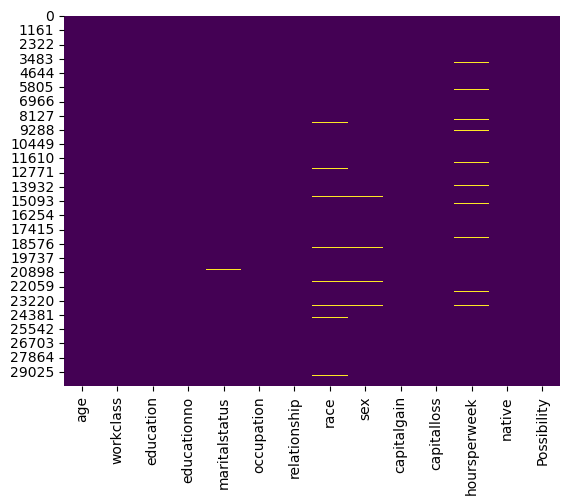

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [7]:
print(df.isnull().sum())


age                0
workclass          0
education          0
educationno        0
maritalstatus    200
occupation         0
relationship       0
race             681
sex              342
capitalgain        0
capitalloss        0
hoursperweek     466
native             0
Possibility        0
dtype: int64


Analysis of duplicate data

In [8]:
# Analyising the number of duplicate rows in the dataset in each country
print(df.duplicated().sum())


3034


Checking for Outliers

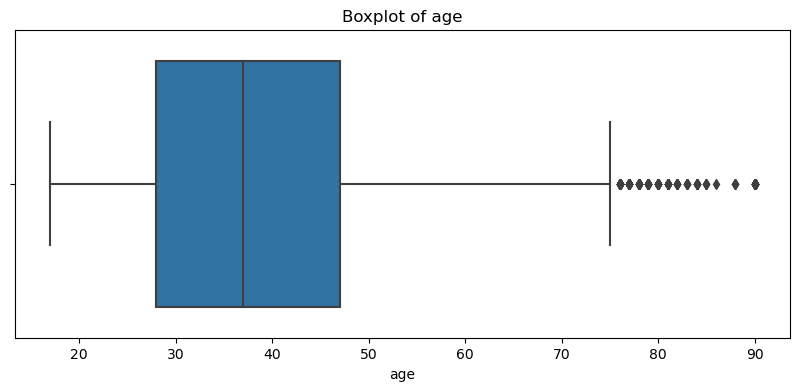

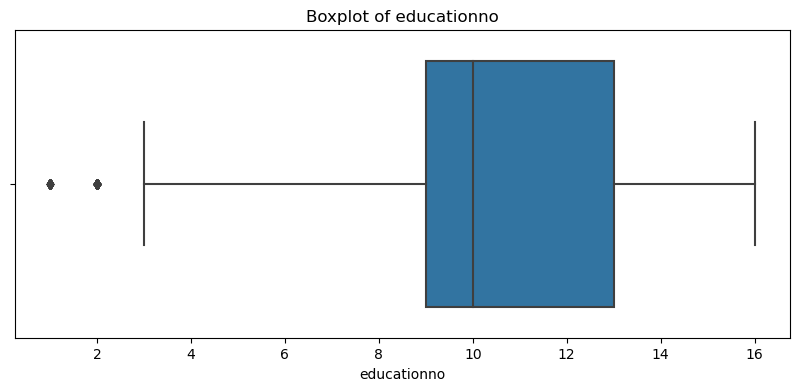

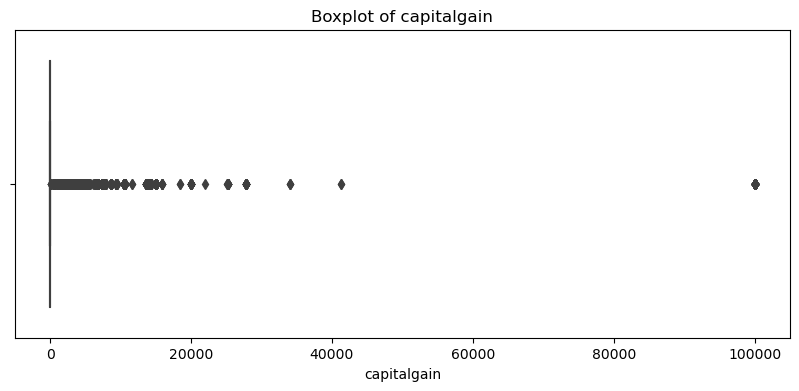

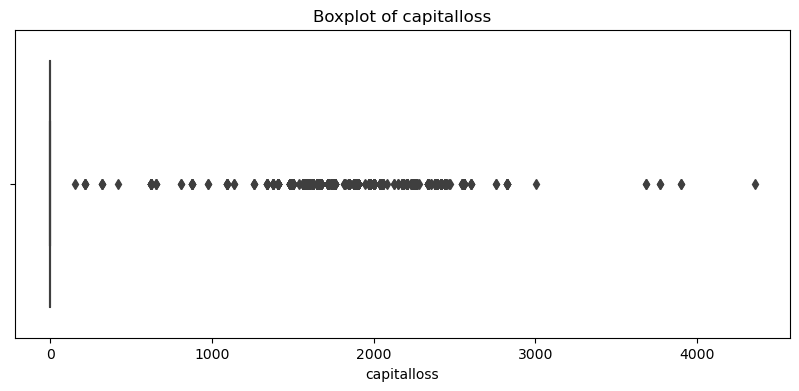

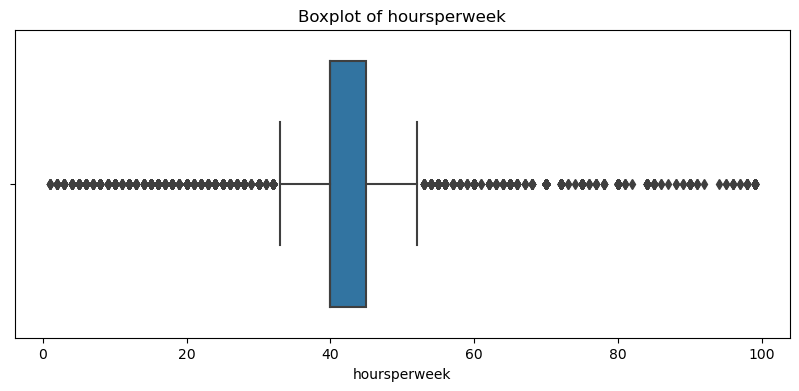

In [9]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()



In [14]:
# Define a function to detect outliers in numerical columns
def find_outliers(df):
    outliers = {}
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        
        if outlier_count > 0:
            outliers[col] = outlier_count
    
    return outliers

# Find outliers in the DataFrame
outliers = find_outliers(df)
print(outliers)

{'age': 169, 'educationno': 196, 'capitalgain': 2538, 'capitalloss': 1426, 'hoursperweek': 7822}


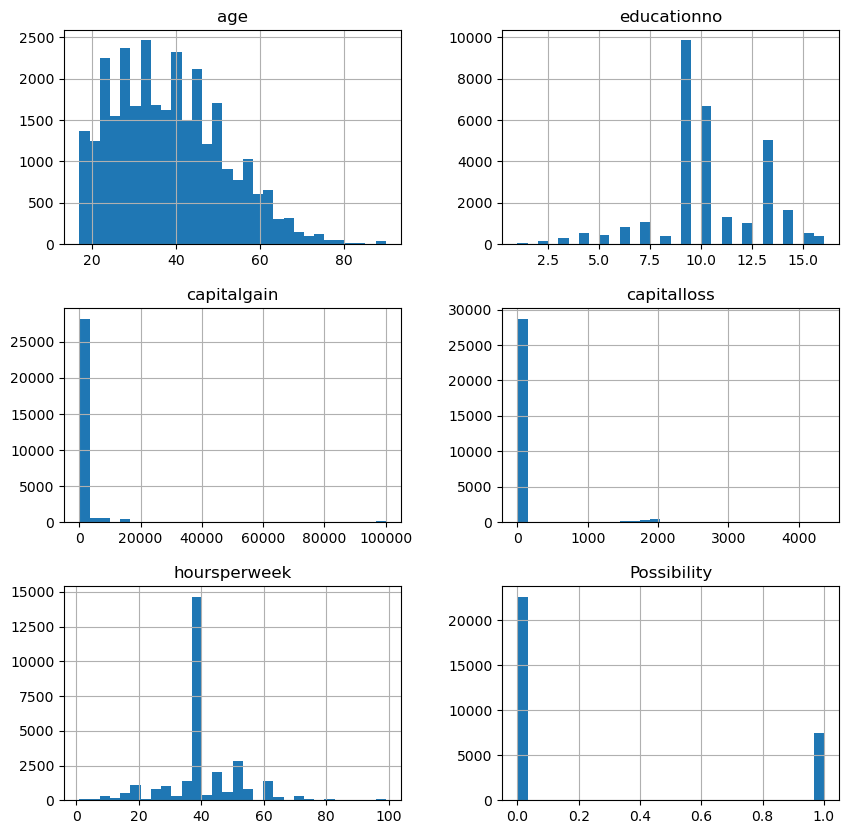

In [15]:
df['Possibility'] = df['Possibility'].map({'<=0.5':0, '>0.5':1})
df.hist(figsize=(10, 10), bins=30)
plt.show()


In [16]:
df['Possibility'].value_counts()

0    22653
1     7508
Name: Possibility, dtype: int64

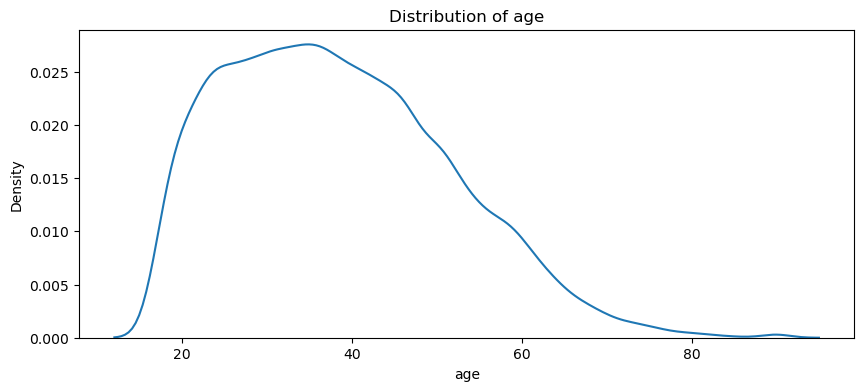

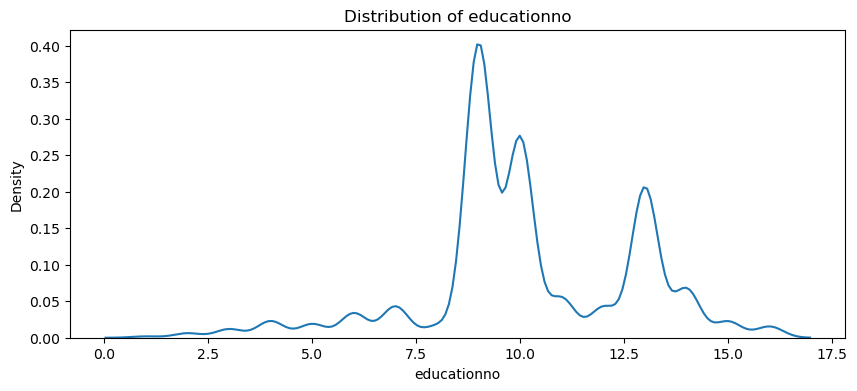

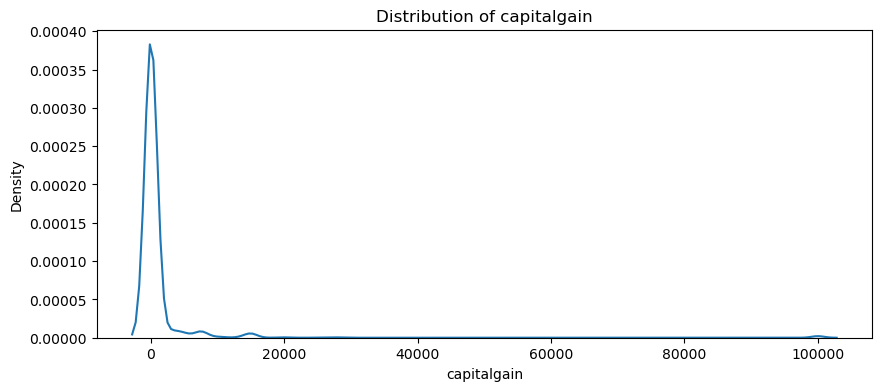

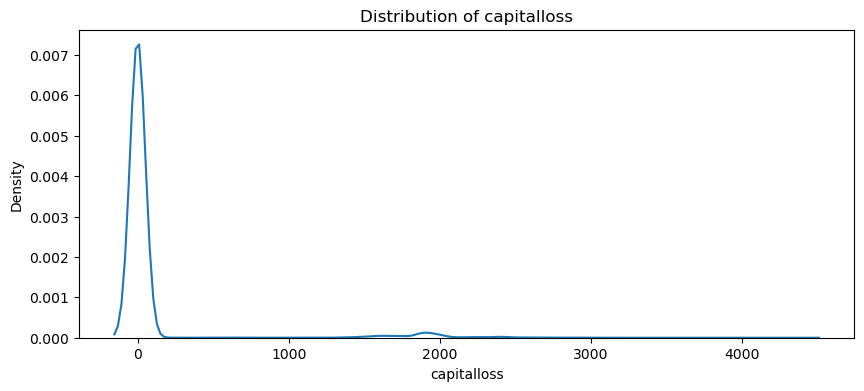

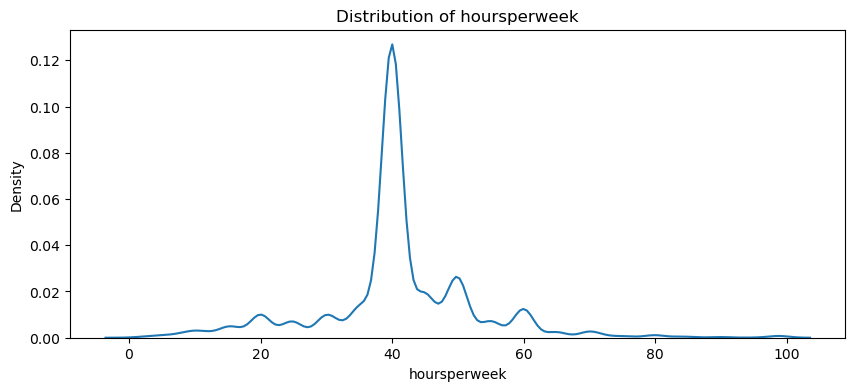

In [11]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()


In [12]:
# Looking at the number of zero values in the column capitalloss and capitalgain

print((df['capitalgain']==0).sum())
print((df['capitalloss']==0).sum())



27623
28735


Correlation between Features

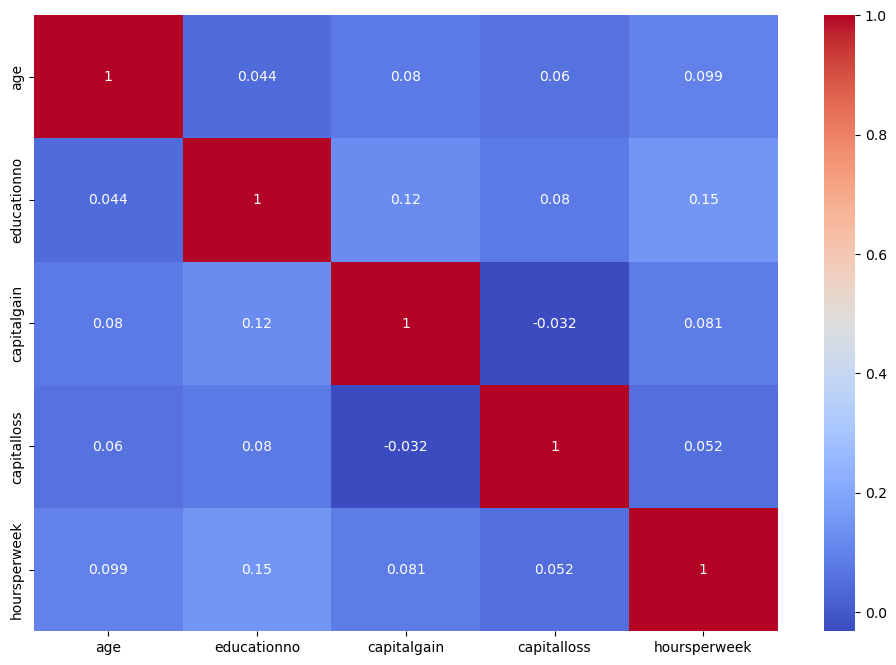

In [13]:
# Convert 'object' columns to numerical representations.
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle columns that cannot be directly converted to numbers.
       # print(f"Column '{col}' could not be converted to numeric.")
      # Consider using one-hot encoding or other encoding techniques.

# Calculate the correlation matrix only on numeric columns.
       correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [78]:
df['Possibility'] = df['Possibility'].map({'<=0.5':0, '>0.5':1})

In [ ]:
print(df.columns)

In [ ]:
# FInd the correlation between the numerical columns and the target column
correlation = df.corr()['Possibility'].sort_values(ascending=False)

print(correlation)

In [ ]:
# Looking at the capitalloss and captialgain columns and printing the number of values >0

print((df['capitalloss']>0).value_counts())
print((df['capitalgain']>0).value_counts())

# Create capitalloss_binary and capitalgain_binary and if >0 replace by 1

# Create binary columns 'capitalloss_binary' and 'capitalgain_binary'
df['capitalloss_binary'] = df['capitalloss'].apply(lambda x: 1 if x > 0 else 0)
df['capitalgain_binary'] = df['capitalgain'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# FInd the correlation between the numerical columns and the target column
correlation = df.corr()['Possibility'].sort_values(ascending=False)

print(correlation)

In [ ]:
# printing the frequency distribution of capitalloss column
print(df['capitalloss'].value_counts().sort_index(ascending=False))    

In [ ]:
sns.pairplot(df, hue='Possibility')  # Replace 'probability' with the actual name of your target column
plt.show()


Analysis of categorical data

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

# Print the number of unique values in each categorical column
for column in categorical_columns:
    print(f"Number of unique values in {column}: {df[column].nunique()}")

for column in categorical_columns:
    print(f"\nAnalysis for {column}:")
    
    # Get value counts
    value_counts = df[column].value_counts()
    
    # Get counts where Possibility = 1
    possibility_1_counts = df[df['Possibility'] == 1][column].value_counts()
    
    # Calculate the ratio
    ratio = possibility_1_counts / value_counts
    
    # Combine all into a single dataframe
    summary = pd.DataFrame({
        'Value_Count': value_counts,
        'Possibility_1_Count': possibility_1_counts,
        'Ratio': ratio
    }).fillna(0)  # Fill NaN values with 0 for categories that don't appear in Possibility = 1
    
    # Format the ratio as percentage
    summary = summary.sort_values(by='Ratio', ascending=False)
    summary['Ratio'] = summary['Ratio'].apply(lambda x: f"{x:.2%}")
    
    print(summary)
    print('-' * 50)
    


Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')
Number of unique values in workclass: 7
Number of unique values in education: 16
Number of unique values in maritalstatus: 7
Number of unique values in occupation: 14
Number of unique values in relationship: 6
Number of unique values in race: 5
Number of unique values in sex: 2
Number of unique values in native: 40

Analysis for workclass:
                  Value_Count  Possibility_1_Count   Ratio
Self-emp-inc             1074                600.0  55.87%
Federal-gov               943                365.0  38.71%
Local-gov                2067                609.0  29.46%
Self-emp-not-inc         2499                714.0  28.57%
State-gov                1279                344.0  26.90%
Private                 22285               4876.0  21.88%
Without-pay                14                  0.0   0.00%
--------------------------------------------------


In [ ]:
# FInd the chi square correlation between the categorical columns and the target column
from scipy.stats import chi2_contingency

for i in categorical_columns:
    contingency_table = pd.crosstab(df[i], df['Possibility'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi2 Statistic for {i}: {chi2}')
    print(f'p-value for {i}: {p}')
    print('---------------------------------')

In [ ]:
# Print the number of unique values in each categorical column and also how many of them have 'Possibility' = 1
for i in categorical_columns:
    print(df[i].nunique())
    print(df[df['Possibility'] == 1][i].value_counts()/df[i].value_counts())
    print('---------------------------------') 

sns.countplot(x='workclass', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()


*   The blue bars represent the number of people classified as innocent (Possibility <= 0.5) in each work class
*   The orange bars represent the number of people classified as potential criminals (Possibility > 0.5) in each work class


In [ ]:
sns.countplot(x='education', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()


In [ ]:
sns.countplot(x='maritalstatus', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()


In [ ]:
sns.countplot(x='occupation', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()

# Now do the same for the 'occupation' column  
occupations_greater = df[df['Possibility'] == '>0.5']['occupation'].value_counts()
occupations_total = df['occupation'].value_counts()
print((occupations_greater / occupations_total).sort_values(ascending=False))



In [ ]:
sns.countplot(x='relationship', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()


In [ ]:
sns.countplot(x='race', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()


In [ ]:
sns.countplot(x='sex', hue='Possibility', data=df)
plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()


In [ ]:
# Draw the count plot for the 'native' column and exclude the 'United-States' and 'Mexico' values.
sns.countplot(x='native', hue='Possibility', data=df[df['native'].isin(['United-States', 'Mexico']) == False])

plt.xticks(rotation=45)  # Rotates the x-axis labels by 45 degrees for better visibility
plt.show()

# Find the names of the country from the 'native' column where the Possibility value is >0.5 for more than 50% of the samples
countries_greater = df[df['Possibility'] == '>0.5']['native'].value_counts()
print(countries_greater)

# Find the total number of values for each country in the 'native' column
countries_total = df['native'].value_counts()
print(countries_total)

# Print the percentage of samples where the Possibility value is >0.5 for each country in descending order
print((countries_greater / countries_total).sort_values(ascending=False))

